# Beam loss from DA - Manual

The beam loss class provides tools to calculate beam loss from dynamic aperture. It can be combined with tools for DA extrapolation to estimate fractions of lost beam over macroscopic time scales. 

## Prerequisites

It is necessary to create the DA tables with a selected set of double gaussians beforehand. The details are described in 

https://gitlab.com/phermes/dynap_beamloss/blob/master/generate_beam_loss_from_da/MANUAL.md

## Examples
Load the base class

In [1]:
from sixdesk.da import beamloss

In [3]:
bl = beamloss("/home/phermes/development/mk_loss_da/Utilities/generate_beam_loss_from_da/output/")

The argument of the beamloss method is the directory in which the DA tables are stored. With the loss vs DA tables loaded, we can calculate the beam loss for a given DA:

In [4]:
loss5 = bl._get_loss_from_single_da(5.0)

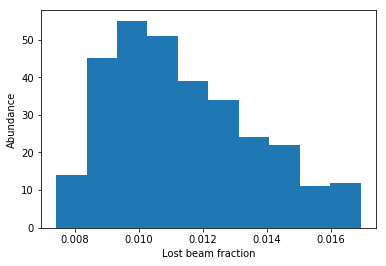

In [5]:
import matplotlib.pyplot as plt
plt.hist(loss5)
plt.xlabel("Lost beam fraction")
plt.ylabel("Abundance")
plt.show()

If we have multiple DA values (for example 60 different values from the random seeds), we can use the get_loss_from_da_series method:

In [6]:
loss_multi = bl.get_loss_from_da_series([5.0, 4.0, 6.0, 12.0])

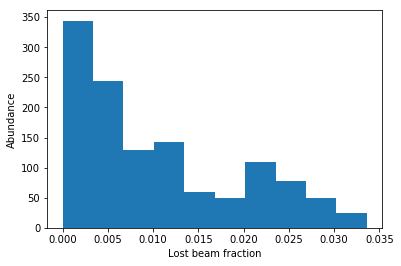

In [7]:
import matplotlib.pyplot as plt
plt.hist(loss_multi)
plt.xlabel("Lost beam fraction")
plt.ylabel("Abundance")
plt.show()

## Calclulating Beam Loss from extrapolated DA

The tools to fit the DA vs turns and extrapolate to macroscopic timescales is explained in detail in 

https://gitlab.com/phermes/dynap_beamloss/blob/master/Examples/manual_da_fit.ipynb

Let's jump right in, fit the DA for a given study and calculate the distribution of losses

In [8]:
from sixdesk.da import davst
a = davst('/home/phermes/development/SixDeskDB/chromB2_QP_20_OC_40.db',emit=2.5)

In [9]:
a.fit()
a.get_extrapolated_da(minutes=30)

/home/phermes/development/mk_loss_da/Examples/sixdesk/da.py:298: RuntimeWarning: invalid value encountered in log10
  da = d + (b / (np.log10(turn) ** kappa))
/home/phermes/development/mk_loss_da/Examples/sixdesk/da.py:298: RuntimeWarning: invalid value encountered in power
  da = d + (b / (np.log10(turn) ** kappa))


To obtain the loss we simply use the get_loss_from_da_series method on the extrapolated DA list

In [23]:
exda = a.extrapolated_da['exda_1800_sec']
loss_from_exda = bl.get_loss_from_da_series(exda)

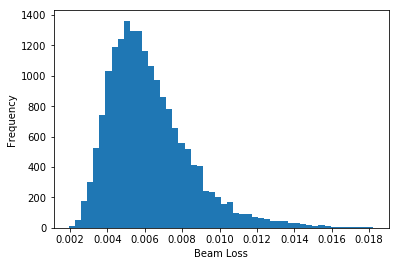

In [25]:
plt.hist(loss_from_exda, bins=50)
plt.xlabel("Beam Loss")
plt.ylabel("Frequency")
plt.show()

We can also use the fit errors to produce a set of possible (randomly generated) combinations of fit parameters and estimate the DA from these. This is still in a beta phase, because the correlations between fit parameters are not yet included. It is assumed that they are uncorrelated.

In [36]:
a.get_extrapolated_da(minutes=30, realizations=1000)

For each seed we can now study 100 different realizations, taking into account the fit errors. 

In [37]:
len(a.extrapolated_da)

60000